In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
from scipy.ndimage.interpolation import rotate

In [2]:
data = np.array([[0.9, 0.05, 0.05], [0.6, 0.4, 0.3], [1, 0, 0], [0, 1, 0]])
data2 = np.array([[0.91, 0.04, 0.05], [0.65, 0.35, 0.35], [1, 0, 0], [0.05, 0.99, 0.05]])
# a = [[0.9, 0.05, 0.05], [0.6, 0.4, 0.3], [1, 0, 0], [0, 1, 0]]
# b = [[0.3, 0.2, 0.5]]

In [3]:
def dist(a, b):
    return np.linalg.norm(np.array(a) - np.array(b), axis=1)

def kdist(a, b):
    eps = 1e-5
    a = np.array(a, dtype='float64')
    b = np.array(b, dtype='float64')
    a[a == 0] = eps
    b[b == 0] = eps
    kl = (a*np.log(a/b) + b*np.log(b/a))/2
    
    return np.sum(kl, axis = 1)
    
def kl_divergence(a, b):
    eps = 1e-10
    a = np.array(a, dtype='float64')
    b = np.array(b, dtype='float64')
    a[a == 0] = eps
    b[b == 0] = eps
    kl = a*np.log(a/b) + b - a

    return np.sum(kl)

def find_centroid(data, alpha = 1e-5, debug = False):
    eps = 1e-5

    data[data == 0] = eps
    g = gmean(data)
    g[g == 0] = eps
    a = np.mean(data, axis = 0)

    c0 = a
    c = c0 + 1
    lambda_ = - kl_divergence(c0, g)

    while np.linalg.norm(abs(c - c0)) > 1e-5:
        c0 = c.copy()
        for i, ci in enumerate(c):
            den = lambertw(a[i]*(np.exp(lambda_ +1))/g[i])
            c[i] = a[i]/den
        lambda_ = - kl_divergence(c, g)
        if debug:
            print(f'new: {c}, previous: {c0}')

    return c

def get_initial_centroids(samples = [], K = 5):
    i = 0
    centroids = []

    for sample in samples:
        sample = list(sample)
        if sample not in centroids:
            centroids.append(sample)
            i += 1
        if i == K:
            return np.array(centroids)
    return centroids

# K-Means using KL-divergence as metric
def kkmeans(matrix, k, centroids = []):
    if not centroids:
        centroids = get_initial_centroids(matrix, k)
    current_centroids = np.array(centroids)
    previous_centroids = np.zeros(current_centroids.shape)

    error = dist(current_centroids, previous_centroids)
    nearest_clusters = np.zeros(len(matrix))
    
    while sum(error) != 0:
        for i in range(len(matrix)):
            distances = kdist(matrix[i], current_centroids)
            nearest_clusters[i] = np.argmin(distances)

            previous_centroids = current_centroids.copy()

        for i in range(k):
#             current_centroids[i] = np.mean(matrix[np.where(nearest_clusters == i)], axis=0)
             current_centroids[i] = find_centroid(matrix[np.where(nearest_clusters == i)])

        error = dist(current_centroids, previous_centroids)
    return (nearest_clusters, current_centroids)

# Standard K-Means
def kmeans(matrix, k, centroids = []):
    if not centroids:
        centroids = get_initial_centroids(matrix, k)
    current_centroids = np.array(centroids)
    previous_centroids = np.zeros(current_centroids.shape)

    error = dist(current_centroids, previous_centroids)
    nearest_clusters = np.zeros(len(matrix))
    
    while sum(error) != 0:
        for i in range(len(matrix)):
            distances = dist(matrix[i], current_centroids)
            nearest_clusters[i] = np.argmin(distances)

            previous_centroids = current_centroids.copy()

        for i in range(k):
            current_centroids[i] = np.mean(matrix[np.where(nearest_clusters == i)], axis=0)
#              current_centroids[i] = find_centroid(matrix[np.where(nearest_clusters == i)])

        error = dist(current_centroids, previous_centroids)
    return (nearest_clusters, current_centroids)

def get_center(features, target):
    target_set = set(target)
    return np.array([np.mean(features[np.where(target == i)], 0) for i in range(len(target_set))])

# closest_cluster, kmeans_centers = kmeans(morphs, K, initial_centroids)

## Calculate centroid based on KL divergence metric

In [60]:
eps = 1e-5


data[data == 0] = eps
g = gmean(data)
g[g == 0] = eps
a = np.mean(data, axis = 0)

c0 = a
c = c0

c_prev = c0 + 1

while np.linalg.norm(abs(c - c_prev)) > 1e-5:
    c_prev = c
    r = [0 for i in range(len(c))]
    lambda_ = - kl_divergence(c, g)
    
    for i, ci in enumerate(c):
        den = lambertw(a[i]*np.exp(lambda_ + 1)/g[i], 0)
        r[i] = a[i]/den
        
    c = np.array(r.copy())
    print(f'new: {c}, previous: {c0}')
    
print(c)

new: [0.48275233+0.j 0.248925  +0.j 0.03556285+0.j], previous: [0.6250025 0.3625025 0.087505 ]
new: [0.34453261+0.j 0.18151052+0.j 0.02832219+0.j], previous: [0.6250025 0.3625025 0.087505 ]
new: [0.29338841+0.j 0.15605285+0.j 0.02532833+0.j], previous: [0.6250025 0.3625025 0.087505 ]
new: [0.2791003 +0.j 0.14887947+0.j 0.02445224+0.j], previous: [0.6250025 0.3625025 0.087505 ]
new: [0.27549156+0.j 0.14706311+0.j 0.02422793+0.j], previous: [0.6250025 0.3625025 0.087505 ]
new: [0.27460557+0.j 0.14661688+0.j 0.02417266+0.j], previous: [0.6250025 0.3625025 0.087505 ]
new: [0.27438961+0.j 0.1465081 +0.j 0.02415918+0.j], previous: [0.6250025 0.3625025 0.087505 ]
new: [0.27433706+0.j 0.14648163+0.j 0.0241559 +0.j], previous: [0.6250025 0.3625025 0.087505 ]
new: [0.27432428+0.j 0.14647519+0.j 0.0241551 +0.j], previous: [0.6250025 0.3625025 0.087505 ]
new: [0.27432117+0.j 0.14647362+0.j 0.02415491+0.j], previous: [0.6250025 0.3625025 0.087505 ]
[0.27432117+0.j 0.14647362+0.j 0.02415491+0.j]


/home/sid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [61]:
norm = 0.2
x = np.random.rand(3)
y = (x/x.sum())*norm
print(f'{x} -> {y}')
print(y.sum())

[0.39433144 0.08015177 0.0756034 ] -> [0.14337067 0.02914151 0.02748782]
0.2


In [62]:
def rotation_x(vector, angle):
    angle = np.radians(angle)
    rot = np.array([[1, 0, 0], [0, np.cos(angle), -np.sin(angle)], [0, np.sin(angle), np.cos(angle)]])
    return np.matmul(rot, vector)

In [63]:
x = np.array([0, 1, -1])
if x[x<0].size > 0 :
    print('hey')

hey


In [64]:
distances = []
for norm in np.linspace(0, 1e-1, 20):
    x = np.random.rand(3)
    delta = (x/x.sum())
    
    for angle in np.linspace(0, 360, 37):
        delta_ = norm*rotation_x(delta, angle)
        c1 = c + delta_
        
        
        if c1.sum() >= 1:
            print('simplex violation')
            continue
        elif c1[c1<0].size > 0:
            print('value less then 0')
            continue
        
        d = []
        d.append(kl_divergence(c1, data[0]))
        d.append(kl_divergence(c1, data[1]))
        d.append(kl_divergence(c1, data[2]))
        d.append(kl_divergence(c1, data[3]))
        d = np.array(d)
        print(f'{angle}: ; delta: {norm}, c1 = {c1}, soma das distâncias para os pontos: {d.sum()}')
        distances.append(d.sum())
        
#     distances = np.array(distances)

/home/sid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


0.0: ; delta: 0.0, c1 = [0.27432117+0.j 0.14647362+0.j 0.02415491+0.j], soma das distâncias para os pontos: 5.860011723287091
10.0: ; delta: 0.0, c1 = [0.27432117+0.j 0.14647362+0.j 0.02415491+0.j], soma das distâncias para os pontos: 5.860011723287091
20.0: ; delta: 0.0, c1 = [0.27432117+0.j 0.14647362+0.j 0.02415491+0.j], soma das distâncias para os pontos: 5.860011723287091
30.0: ; delta: 0.0, c1 = [0.27432117+0.j 0.14647362+0.j 0.02415491+0.j], soma das distâncias para os pontos: 5.860011723287091
40.0: ; delta: 0.0, c1 = [0.27432117+0.j 0.14647362+0.j 0.02415491+0.j], soma das distâncias para os pontos: 5.860011723287091
50.0: ; delta: 0.0, c1 = [0.27432117+0.j 0.14647362+0.j 0.02415491+0.j], soma das distâncias para os pontos: 5.860011723287091
60.0: ; delta: 0.0, c1 = [0.27432117+0.j 0.14647362+0.j 0.02415491+0.j], soma das distâncias para os pontos: 5.860011723287091
70.0: ; delta: 0.0, c1 = [0.27432117+0.j 0.14647362+0.j 0.02415491+0.j], soma das distâncias para os pontos: 5.8

## DCGraM part

In [1]:
import sys
sys.path.insert(0, '..')
import numpy as np
import os
import yaml
import sequenceanalyzer as sa
import partition as pt
import partitionset as ps
import sequence_generator as sg
import dmarkov as dm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as k
import save_plot as sp
import eigenvectorcalcs as eig
import moore
from scipy.special import lambertw
from scipy.stats.mstats import gmean
# sys.path.insert(0, 'Code')

# path = 'logistic_map'
# L = 10000000

path = '10dbq1'
L = 50000000

In [ ]:
def dist(a, b):
    return np.linalg.norm(np.array(a) - np.array(b), axis=1)

def kdist(a, b):
    eps = 1e-5
    a = np.array(a, dtype='float64')
    b = np.array(b, dtype='float64')
    a[a == 0] = eps
    b[b == 0] = eps
    kl = (a*np.log(a/b) + b*np.log(b/a))/2
    
    return np.sum(kl, axis = 1)
    
def kl_divergence(a, b):
    eps = 1e-10
    a = np.array(a, dtype='float64')
    b = np.array(b, dtype='float64')
    a[a == 0] = eps
    b[b == 0] = eps
    kl = a*np.log(a/b) + b - a

    return np.sum(kl)

def find_centroid(data, alpha = 1e-5, debug = False):
    eps = 1e-5

    data[data == 0] = eps
    g = gmean(data)
    g[g == 0] = eps
    a = np.mean(data, axis = 0)

    c0 = a
    c = c0 + 1
    lambda_ = - kl_divergence(c0, g)

    while np.linalg.norm(abs(c - c0)) > 1e-5:
        c0 = c.copy()
        for i, ci in enumerate(c):
            den = lambertw(a[i]*(np.exp(lambda_ +1))/g[i])
            c[i] = a[i]/den
        lambda_ = - kl_divergence(c, g)
        if debug:
            print(f'new: {c}, previous: {c0}')

    return c

def get_initial_centroids(samples = [], K = 5):
    i = 0
    centroids = []

    for sample in samples:
        sample = list(sample)
        if sample not in centroids:
            centroids.append(sample)
            i += 1
        if i == K:
            return np.array(centroids)
    return centroids

# K-Means using KL-divergence as metric
def kkmeans(matrix, k, centroids = []):
    if not centroids:
        centroids = get_initial_centroids(matrix, k)
    current_centroids = np.array(centroids)
    previous_centroids = np.zeros(current_centroids.shape)

    error = dist(current_centroids, previous_centroids)
    nearest_clusters = np.zeros(len(matrix))
    
    while sum(error) != 0:
        for i in range(len(matrix)):
            distances = kdist(matrix[i], current_centroids)
            nearest_clusters[i] = np.argmin(distances)

            previous_centroids = current_centroids.copy()

        for i in range(k):
#             current_centroids[i] = np.mean(matrix[np.where(nearest_clusters == i)], axis=0)
             current_centroids[i] = find_centroid(matrix[np.where(nearest_clusters == i)])

        error = dist(current_centroids, previous_centroids)
    return (nearest_clusters, current_centroids)

# Standard K-Means
def kmeans(matrix, k, centroids = []):
    if not centroids:
        centroids = get_initial_centroids(matrix, k)
    current_centroids = np.array(centroids)
    previous_centroids = np.zeros(current_centroids.shape)

    error = dist(current_centroids, previous_centroids)
    nearest_clusters = np.zeros(len(matrix))
    
    while sum(error) != 0:
        for i in range(len(matrix)):
            distances = dist(matrix[i], current_centroids)
            nearest_clusters[i] = np.argmin(distances)

            previous_centroids = current_centroids.copy()

        for i in range(k):
            current_centroids[i] = np.mean(matrix[np.where(nearest_clusters == i)], axis=0)
#              current_centroids[i] = find_centroid(matrix[np.where(nearest_clusters == i)])

        error = dist(current_centroids, previous_centroids)
    return (nearest_clusters, current_centroids)

def get_center(features, target):
    target_set = set(target)
    return np.array([np.mean(features[np.where(target == i)], 0) for i in range(len(target_set))])

# closest_cluster, kmeans_centers = kmeans(morphs, K, initial_centroids)

In [ ]:
def logistic_map(x0 = 0.5, r = 3.75):
    x = [x0]
    s = ''
    for i in range(L):
        x.append(r*x[i]*(1-x[i]))
        if x[i] <= 0.67:
             s += '0'
        elif x[i] <= 0.79:
             s += '1'
        else:
             s += '2'
    return s

# os.makedirs('logistic_map/sequences')
# os.makedirs('logistic_map/machine')
# os.makedirs('logistic_map/probabilities/conditional')
s = logistic_map()

with open('logistic_map/sequences/len_10000000.yaml', 'w') as f:
    yaml.dump(s, f)

### Load sequence with length L from path

In [8]:
with open(f'{path}/sequences/len_{L}.yaml', 'r') as f:
    s = yaml.load(f)

### Compute probabilities, conditional probabilities, alphabet and machines

In [3]:
D = 4

p, a = sa.calc_probs(s, 10)
p_cond = sa.calc_cond_probs(p, a, 10)

with open(f'{path}/probabilities/len_{L}.yaml', 'w') as f:
    yaml.dump(p, f)
with open(f'{path}/probabilities/conditional/len_{L}.yaml', 'w') as f:
    yaml.dump(p_cond, f)
with open(f'{path}/probabilities/alphabet/len_{L}.yaml', 'w') as f:
    yaml.dump(a, f)
    
m = dm.DMarkov(p_cond, D, a, p)
print(f'Number of states for D = {D}: {len(m.states)}')

with open(f'{path}/machine/dmarkov_len_{L}.yaml', 'w') as f:
    yaml.dump(m, f)

NameError: name 's' is not defined

In [33]:
m.states[0].state_prob

0.0

### Load probabilities, conditional probabilities, alphabet and machines

In [3]:
with open(f'{path}/probabilities/len_{L}.yaml', 'r') as f:
    p = yaml.load(f)
with open(f'{path}/probabilities/conditional/len_{L}.yaml', 'r') as f:
    p_cond = yaml.load(f)
with open(f'{path}/probabilities/alphabet/len_{L}.yaml', 'r') as f:
    a = yaml.load(f)
    
with open(f'{path}/machine/dmarkov_len_{L}.yaml', 'r') as f:
    m = yaml.load(f)

In [4]:
D = 4
m = dm.DMarkov(p_cond, D, a, p)
print(f'Number of states for D = {D}: {len(m.states)}')

with open(f'{path}/machine/dmarkov_len_{L}.yaml', 'w') as f:
    yaml.dump(m, f)

Number of states for D = 4: 16


In [5]:
m.states[1].state_prob

0.0008072801614560323

## Normal K-Means

In [6]:
K = 5

In [7]:
idx = dict((s.name, m.states.index(s)) for s in m.states)
morphs = []
all_oedges = [state.outedges for state in m.states]

for oedges in all_oedges:
    curr_morph = [0] * len(m.index_labels)
    for oedge in oedges:
        label = oedge[0]
        curr_morph[m.index_labels[label]] = oedge[-1]
    morphs.append(curr_morph)
    
morphs = np.array(morphs)
# data = morphs.T
# data.shape
closest_cluster, kmeans_centers = kmeans(morphs, K)

In [8]:
kmeans_centers

array([[0.6761427 , 0.3238573 ],
       [0.77229629, 0.22770371],
       [0.71728066, 0.28271934],
       [0.887347  , 0.112653  ],
       [0.69948469, 0.30051531]])

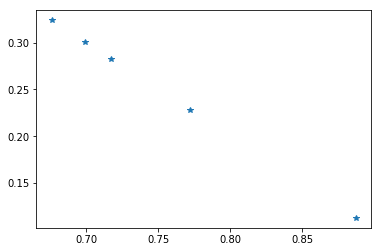

In [9]:
plt.plot([x[0] for x in kmeans_centers], [x[1] for x in kmeans_centers], '*')
plt.show()

In [ ]:
#MOORE
clusters = [[] for i in closest_cluster]
# print(f"Clusterization check")
for i in range(len(morphs)):
    cluster_index = int(closest_cluster[i])
    # print(f"\tCenter: {kmeans.cluster_centers_[state_idx]}, Outedge: {machine.states[i].outedges}")
    clusters[cluster_index].append(m.states[i])
# Fix empty clusters problem
clusters = [c for c in clusters if c]
# Split cluster if two or more states have differente outedges

new_clusters = []

for c in clusters:
    new_clusters_dict = dict()
    for st in c:
        key = ''.join([oedge[0] for oedge in st.outedges])
        if key in new_clusters_dict:
            new_clusters_dict[key].append(st)
        else:
            new_clusters_dict[key] = [st]
    for new_c in new_clusters_dict.values():
        new_clusters.append(new_c)

initial_pt = []

for p in new_clusters:
    partition = pt.Partition()
    for state in p:
        state.state_prob
        partition.add_to_partition(state)
    initial_pt.append(partition)

initial_pt = ps.PartitionSet(initial_pt)

final_pt = moore.moore_by_parts(m, initial_pt, n_iter = -1)

import pdb
pdb.run("new_pt = final_pt.redefine_partition(m)")

Moore finished with 3 iterations
> <string>(1)<module>()


In [72]:
# with open("../../dcgram_files/logistic_map_v1/results/machines/dcgram/before_redefine/initial_D5_K3_n1.yaml", "r") as f:
#     mas = yaml.load(f)

# for p in mas.partitions:
#     p.name.sort
#     print(p.name)
    
# print()
# for p in initial_pt.partitions:
# #     p.name = (p.name).sort()
#     p.name.sort
#     print(p.name)

['00202', '02002', '02012', '01202', '01102', '01112', '20202', '20102', '20112', '10202', '11202', '11102', '11112']
['02020', '02011', '01111', '20201', '20111', '12020', '11111']
['02010', '01020', '01120', '01110', '20020', '20200', '20120', '20110', '11020', '11120', '11110']

['01111', '02011', '02020', '11111', '12020', '20111', '20201']
['00202', '01102', '01112', '01202', '02002', '02012', '10202', '11102', '11112', '11202', '20102', '20112', '20202']
['01020', '01110', '01120', '02010', '11020', '11110', '11120', '20020', '20110', '20120', '20200']


## K-Means with KL metric

In [19]:
K = 5

In [23]:
idx = dict((s.name, m.states.index(s)) for s in m.states)
morphs = []
all_oedges = [state.outedges for state in m.states]

for oedges in all_oedges:
    curr_morph = [0] * len(m.index_labels)
    for oedge in oedges:
        label = oedge[0]
        curr_morph[m.index_labels[label]] = oedge[-1]
    morphs.append(curr_morph)
    
morphs = np.array(morphs)
# data = morphs.T
# data.shape
closest_cluster, kmeans_centers = kkmeans(morphs, K)

/home/sid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


In [24]:
#MOORE
clusters = [[] for i in closest_cluster]
# print(f"Clusterization check")
for i in range(len(morphs)):
    cluster_index = int(closest_cluster[i])
    # print(f"\tCenter: {kmeans.cluster_centers_[state_idx]}, Outedge: {machine.states[i].outedges}")
    clusters[cluster_index].append(m.states[i])
# Fix empty clusters problem
clusters = [c for c in clusters if c]
# Split cluster if two or more states have differente outedges

new_clusters = []

for c in clusters:
    new_clusters_dict = dict()
    for st in c:
        key = ''.join([oedge[0] for oedge in st.outedges])
        if key in new_clusters_dict:
            new_clusters_dict[key].append(st)
        else:
            new_clusters_dict[key] = [st]
    for new_c in new_clusters_dict.values():
        new_clusters.append(new_c)

initial_pt = []

for p in new_clusters:
    partition = pt.Partition()
    for state in p:
        partition.add_to_partition(state)
    initial_pt.append(partition)

initial_pt = ps.PartitionSet(initial_pt)

final_pt = moore.moore_by_parts(m, initial_pt, n_iter = -1)

new_pt = final_pt.redefine_partition(m)

Moore finished with 3 iterations


ValueError: Length of weights not compatible with specified axis.

In [22]:
for p in initial_pt:
    p.name.sort
    print(p.name)

['1111']
['1100', '1010', '1001', '0110', '0101', '0011']
['1110', '1101', '1011']
['1000', '0100', '0010', '0001', '0000']
['0111']


In [24]:
for p in initial_pt2.partitions:
    print(p.name)

['0020', '0200', '0120', '0110', '2010', '1020', '1120', '1110']
['0202', '0102', '0112', '2002', '2012', '1202', '1102', '1112']
['0201']
['0111', '2011', '1111']
['2020']
